# Import Libraries

In [137]:
import h5py
import random
import scipy.sparse

import numpy as np
import matplotlib.pyplot as plt

# Fetch Data

In [138]:
# code from lecture notes
MNIST_data = h5py.File('MNISTdata.hdf5', 'r')
x_train = np.float32(MNIST_data['x_train'][:] )
y_train = np.int32(np.array(MNIST_data['y_train'][:,0]))
x_test = np.float32(MNIST_data['x_test'][:])
y_test = np.int32(np.array(MNIST_data['y_test'][:,0]))

# Helper Function for Data Pre-Process

In [139]:
def one_hot(Y):
    m = Y.shape[0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

In [140]:
one_hot_y_test = one_hot(y_test)
one_hot_y_train = one_hot(y_train)

# Helper Function for Printing

In [141]:
def accuracy(x_data,y_data,w):
    probability = softmax(np.dot(x_data,w))
    res = np.argmax(probability,axis=1)
    accuracy = (sum(res == y_data.reshape(10000,)))/((len(x_data)))
    return accuracy

def loss(w,x,y):
    m = x.shape[0]
    z_all = np.dot(x,w)
    f_z_all = softmax(z_all) 
    loss = (-1/m) * np.sum(y*np.log(f_z_all))
    return loss

# Parameters for Training

In [162]:
batch_size = 32
total_iteration = 2800
learning_rate_arr = [0.5,0.2,0.05,0.01]

# Softmax Function

In [163]:
def softmax(z):
    exp = np.exp(z-np.max(z, axis=1).reshape((-1,1)))
    norms = np.sum(exp, axis=1).reshape((-1,1))
    return exp / norms

# Gradient Decent Function

In [164]:
def gradient(w,x,y):
    n = [random.randint(0,len(x)-1) for i in range(batch_size)]
    xs = x[n]
    ys = y[n]
    z = softmax(np.dot(xs,w))
    gradient = -(1/batch_size)*np.dot(xs.T,(ys-z))
    return gradient

In [173]:
w = np.zeros([x_train.shape[1],len(np.unique(y_train))])
loss_list = np.zeros(28)
acc_list = np.zeros(28)
for i in range(total_iteration):
    gradient_i = gradient(w,x_train,one_hot_y_train)
    lr = learning_rate_arr[(i//int(total_iteration/4))]
    w -= (lr* gradient_i)
    if i%100 == 0:
        curr_loss = loss(w,x_train,one_hot_y_train)
        curr_acc = accuracy(x_test,y_test,w)
        loss_list[int(i/100)] = curr_loss
        acc_list[int(i/100)] = curr_acc
        print("Iteration:",i," Loss:",curr_loss," Accuracy:",curr_acc)

Iteration: 0  Loss: 2.6386721528149115  Accuracy: 0.1059
Iteration: 100  Loss: 0.4674560218638714  Accuracy: 0.8692
Iteration: 200  Loss: 0.38750435547474543  Accuracy: 0.8932
Iteration: 300  Loss: 0.37538129423984823  Accuracy: 0.8949
Iteration: 400  Loss: 0.36536915143485316  Accuracy: 0.8978
Iteration: 500  Loss: 0.3436672859195566  Accuracy: 0.9081
Iteration: 600  Loss: 0.36578639248677497  Accuracy: 0.8959
Iteration: 700  Loss: 0.3458743329059674  Accuracy: 0.9034
Iteration: 800  Loss: 0.3178949142693043  Accuracy: 0.9134
Iteration: 900  Loss: 0.32411204758092993  Accuracy: 0.9087
Iteration: 1000  Loss: 0.32574132536106687  Accuracy: 0.9117
Iteration: 1100  Loss: 0.30888816681162373  Accuracy: 0.9165
Iteration: 1200  Loss: 0.3090978621064336  Accuracy: 0.9167
Iteration: 1300  Loss: 0.30635829688914723  Accuracy: 0.9156
Iteration: 1400  Loss: 0.3051119720830487  Accuracy: 0.9162
Iteration: 1500  Loss: 0.30226077903331894  Accuracy: 0.9173
Iteration: 1600  Loss: 0.30036961394310974 

# Plot the Accuracy vs. Iteration

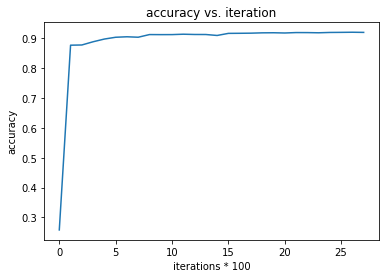

In [169]:
plt.plot(accs)
plt.xlabel("iterations * 100")
plt.ylabel("accuracy")
plt.title("accuracy vs. iteration")
plt.show()

# Print the Final Accuracy

In [167]:
print("final accuracy of test set is:", accuracy(x_test,y_test,w))

final accuracy of test set is: 0.919
